In [97]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

In [98]:
cu = pd.read_csv('EDA_customer.csv')
tr = pd.read_csv('EDA_transaction.csv')
pr = pd.read_csv('EDA_product.csv')

In [99]:
cl = pd.read_parquet('EDA_click_stream.parquet')
cl

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,None,None,None,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,None,None,None,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,NaN,NaN,None,None,None,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,15315.0,4.0,313529.0,None,None,None,NaN
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,NaN,NaN,NaN,Success,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12833597,ad1063b0-a6e5-40a9-aed6-d1b45741e571,SEARCH,2021-06-07T04:37:53.354381Z,4b3b91a5-9bda-44de-87dc-153367071dfc,MOBILE,NaN,NaN,NaN,None,Bekas,None,NaN
12833598,64585e37-3fe7-48d7-b79b-ebcb70230eb2,HOMEPAGE,2021-05-05T11:44:14.985835Z,ab0acc87-9578-408a-b47f-c46996b8b52f,MOBILE,NaN,NaN,NaN,None,None,None,NaN
12833599,64585e37-3fe7-48d7-b79b-ebcb70230eb2,ADD_TO_CART,2021-05-05T11:53:10.985835Z,230d7b67-9934-42f9-9509-b330ac6ae777,MOBILE,19820.0,1.0,88918.0,None,None,None,NaN
12833600,64585e37-3fe7-48d7-b79b-ebcb70230eb2,BOOKING,2021-05-05T12:10:09.135142Z,8996ce49-c5dd-41ed-9231-28bfdb634cbe,MOBILE,NaN,NaN,NaN,Success,None,None,NaN


In [100]:
cl.isnull().sum()

session_id                0
event_name                0
event_time                0
event_id                  0
traffic_source            0
product_id         10896758
quantity           10896445
item_price         10896445
payment_status     11981020
search_keywords    11660336
promo_code         12507067
promo_amount       12507067
dtype: int64

### event_name

In [101]:
cl['event_name'].value_counts(normalize=True)

event_name
CLICK          0.194648
HOMEPAGE       0.193798
ADD_TO_CART    0.150944
SCROLL         0.129626
ITEM_DETAIL    0.100548
SEARCH         0.091421
BOOKING        0.066434
PROMO_PAGE     0.047136
ADD_PROMO      0.025444
Name: proportion, dtype: float64

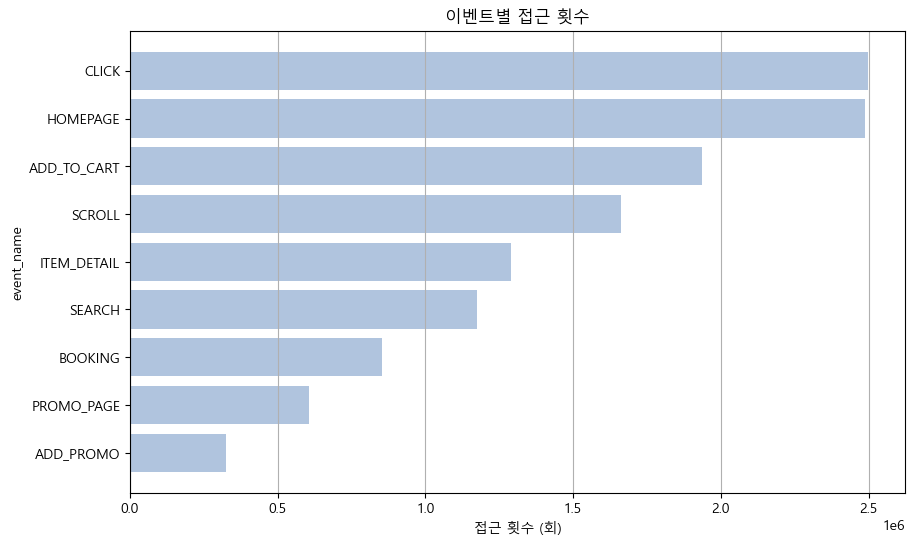

In [102]:
event_counts = cl['event_name'].value_counts()

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6))

plt.barh(event_counts.index, event_counts.values, color='lightsteelblue')

plt.xlabel('접근 횟수 (회)')
plt.ylabel('event_name')
plt.title('이벤트별 접근 횟수')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

### event_id

In [103]:
len(cl['event_id'].unique()) == cl.shape[0]

True

In [104]:
# event_id는 고유값 → 컬럼 삭제
cl = cl.drop(['event_id'], axis=1)
cl.head()

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,MOBILE,15315.0,4.0,313529.0,None,None,None,NaN
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,MOBILE,NaN,NaN,NaN,Success,None,None,NaN


### traffic_source

In [105]:
cl['traffic_source'].value_counts(normalize=True)

traffic_source
MOBILE    0.899849
WEB       0.100151
Name: proportion, dtype: float64

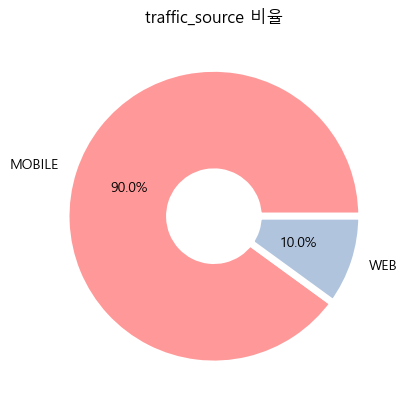

In [106]:
colors = ['#ff9999', 'lightsteelblue', '#8fd9b6', 'silver']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

gender_counts = cl['traffic_source'].value_counts(normalize=True)
plt.title('traffic_source 비율')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

### customer_id 컬럼 생성

In [107]:
tr_del = tr.drop_duplicates(['created_at']).sort_values(by='created_at').reset_index(drop=True)

sessionid_customerid_dict = {}
for i in range(len(tr_del)):
    sessionid_customerid_dict[tr_del['session_id'][i]] = tr_del['customer_id'][i]

cl['customer_id'] = cl['session_id'].map(sessionid_customerid_dict)
cl

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,18770.0
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,MOBILE,15315.0,4.0,313529.0,None,None,None,NaN,18770.0
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,MOBILE,NaN,NaN,NaN,Success,None,None,NaN,18770.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12833597,ad1063b0-a6e5-40a9-aed6-d1b45741e571,SEARCH,2021-06-07T04:37:53.354381Z,MOBILE,NaN,NaN,NaN,None,Bekas,None,NaN,44381.0
12833598,64585e37-3fe7-48d7-b79b-ebcb70230eb2,HOMEPAGE,2021-05-05T11:44:14.985835Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,83906.0
12833599,64585e37-3fe7-48d7-b79b-ebcb70230eb2,ADD_TO_CART,2021-05-05T11:53:10.985835Z,MOBILE,19820.0,1.0,88918.0,None,None,None,NaN,83906.0
12833600,64585e37-3fe7-48d7-b79b-ebcb70230eb2,BOOKING,2021-05-05T12:10:09.135142Z,MOBILE,NaN,NaN,NaN,Success,None,None,NaN,83906.0


### search_keywords

In [108]:
df = cl[cl['search_keywords'].notnull()].reset_index(drop=True)
df

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id
0,7d440441-e67a-4d36-b324-80ffd636d166,SEARCH,2019-09-01T12:07:00.322763Z,MOBILE,NaN,NaN,NaN,None,Dress Kondangan,None,NaN,18770.0
1,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,SEARCH,2019-09-09T05:06:26.425431Z,MOBILE,NaN,NaN,NaN,None,Tas Wanita,None,NaN,18770.0
2,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,SEARCH,2019-09-09T08:50:27.425431Z,MOBILE,NaN,NaN,NaN,None,Celana Panjang,None,NaN,18770.0
3,98e66f53-f24f-4238-8c9c-34a0482e22d5,SEARCH,2019-10-02T17:17:08.425431Z,MOBILE,NaN,NaN,NaN,None,Kaos,None,NaN,18770.0
4,98e66f53-f24f-4238-8c9c-34a0482e22d5,SEARCH,2019-10-02T21:07:33.425431Z,MOBILE,NaN,NaN,NaN,None,Sepatu,None,NaN,18770.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1173261,f38416ce-51f2-46b0-a476-776d8fed1cb0,SEARCH,2021-08-01T08:03:07.737783Z,WEB,NaN,NaN,NaN,None,Sepatu Adidas,None,NaN,82032.0
1173262,c1ce86f6-858b-4009-af5b-f1483a28d020,SEARCH,2020-09-22T22:44:59.674560Z,WEB,NaN,NaN,NaN,None,Barang Bekas,None,NaN,42455.0
1173263,f5c4bbe0-f977-45bb-af23-6ab524df7777,SEARCH,2022-04-09T21:01:31.132472Z,MOBILE,NaN,NaN,NaN,None,Baju,None,NaN,64875.0
1173264,ad1063b0-a6e5-40a9-aed6-d1b45741e571,SEARCH,2021-06-07T04:37:53.354381Z,MOBILE,NaN,NaN,NaN,None,Bekas,None,NaN,44381.0


In [109]:
df['search_keywords'].unique()

array(['Dress Kondangan', 'Tas Wanita', 'Celana Panjang', 'Kaos',
       'Sepatu', 'Tas Kerja', 'T-Shirt', 'Topi', 'Bekas', 'Baju',
       'Thrift', 'Sepatu Nike', 'Dress Pesta', 'Sepatu Adidas', 'Second',
       'T-shirt', 'Jam', 'Celana', 'Second Hand', 'Barang Bekas',
       'Sendal', 'Daster', 'Baju Tidur'], dtype=object)

In [110]:
# Dress Kondangan : 웨딩드레스
# Tas Wanita : 여성 백
# Celana Panjang : 긴 바지
# Kaos : 셔츠
# Sepatu : 신발
# Tas Kerja : 작업용 가방
# T-Shirt : 티셔츠
# Topi: 모자 (hat)
    # Bekas : 중고
# Baju : 드레스
    # Thrift : 중고
# Sepatu Nike : 나이키신발
# Dress Pesta : 파티 드레스
# Sepatu Adidas : 아디다스 신발
    # Second : 중고
# Jam : ~시 (시간을 나타냄)
# Celana : 바지
    # Second Hand : 중고
    # Barang Bekas : 중고
# Sendal : 샌들
# Daster : 하우스 드레스
# Baju Tidur : 나이트 가운

In [111]:
dress_list = ['Dress Kondangan', 'Baju', 'Dress Pesta', 'Daster']
bag_list = ['Tas Wanita', 'Tas Kerja']
pants_list = ['Celana Panjang', 'Celana']
shirts_list = ['Kaos', 'T-Shirt', 'T-shirt']
shoes_list = ['Sepatu', 'Sepatu Nike', 'Sepatu Adidas', 'Sendal']
hat_list = ['Topi']
second_list = ['Bekas', 'Thrift', 'Second', 'Second Hand', 'Barang Bekas']
etc = ['Baju Tidur', 'Jam']
# Jam?

def keywords_category(value):
    if value in dress_list:
        return '드레스'
    elif value in bag_list:
        return '가방'
    elif value in pants_list:
        return '바지'
    elif value in shirts_list:
        return '셔츠'
    elif value in shoes_list:
        return '신발'
    elif value in hat_list:
        return '모자'
    elif value in second_list:
        return '중고품'
    elif value in etc:
        return '기타'

df['search_category'] = df['search_keywords'].apply(keywords_category)
df

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id,search_category
0,7d440441-e67a-4d36-b324-80ffd636d166,SEARCH,2019-09-01T12:07:00.322763Z,MOBILE,NaN,NaN,NaN,None,Dress Kondangan,None,NaN,18770.0,드레스
1,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,SEARCH,2019-09-09T05:06:26.425431Z,MOBILE,NaN,NaN,NaN,None,Tas Wanita,None,NaN,18770.0,가방
2,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,SEARCH,2019-09-09T08:50:27.425431Z,MOBILE,NaN,NaN,NaN,None,Celana Panjang,None,NaN,18770.0,바지
3,98e66f53-f24f-4238-8c9c-34a0482e22d5,SEARCH,2019-10-02T17:17:08.425431Z,MOBILE,NaN,NaN,NaN,None,Kaos,None,NaN,18770.0,셔츠
4,98e66f53-f24f-4238-8c9c-34a0482e22d5,SEARCH,2019-10-02T21:07:33.425431Z,MOBILE,NaN,NaN,NaN,None,Sepatu,None,NaN,18770.0,신발
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173261,f38416ce-51f2-46b0-a476-776d8fed1cb0,SEARCH,2021-08-01T08:03:07.737783Z,WEB,NaN,NaN,NaN,None,Sepatu Adidas,None,NaN,82032.0,신발
1173262,c1ce86f6-858b-4009-af5b-f1483a28d020,SEARCH,2020-09-22T22:44:59.674560Z,WEB,NaN,NaN,NaN,None,Barang Bekas,None,NaN,42455.0,중고품
1173263,f5c4bbe0-f977-45bb-af23-6ab524df7777,SEARCH,2022-04-09T21:01:31.132472Z,MOBILE,NaN,NaN,NaN,None,Baju,None,NaN,64875.0,드레스
1173264,ad1063b0-a6e5-40a9-aed6-d1b45741e571,SEARCH,2021-06-07T04:37:53.354381Z,MOBILE,NaN,NaN,NaN,None,Bekas,None,NaN,44381.0,중고품


In [112]:
df['search_category'].isnull().sum()

0

In [113]:
data = df['search_category'].value_counts(normalize=True)*100
data

search_category
드레스    35.634971
중고품    19.167179
셔츠     16.274485
가방     14.273575
신발     10.059185
바지      3.387808
기타      0.789932
모자      0.412865
Name: proportion, dtype: float64

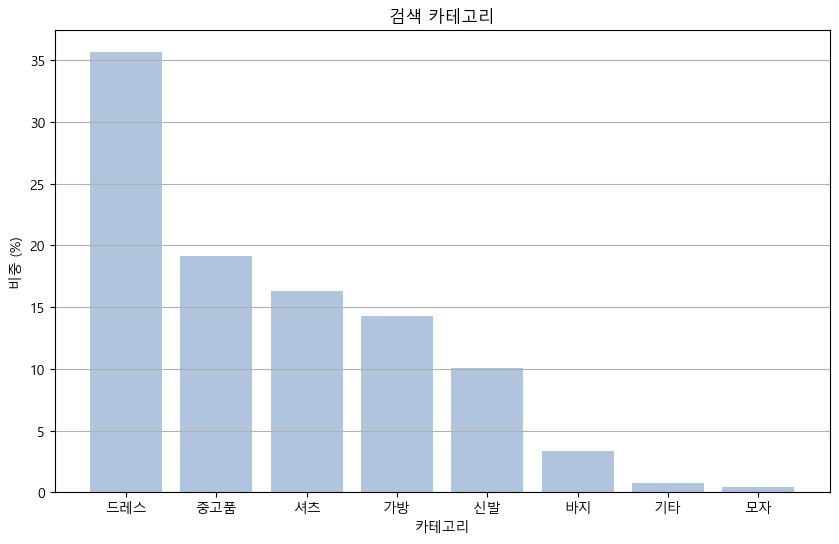

In [114]:
plt.figure(figsize=(10, 6))
plt.bar(data.index, data.values, color='lightsteelblue')
plt.xlabel('카테고리')
plt.ylabel('비중 (%)')
plt.title('검색 카테고리')
plt.grid(axis='y')
plt.show()

In [115]:
# 고객이 드레스를 많이 검색함
# 중고품에도 꽤 관심을 보임

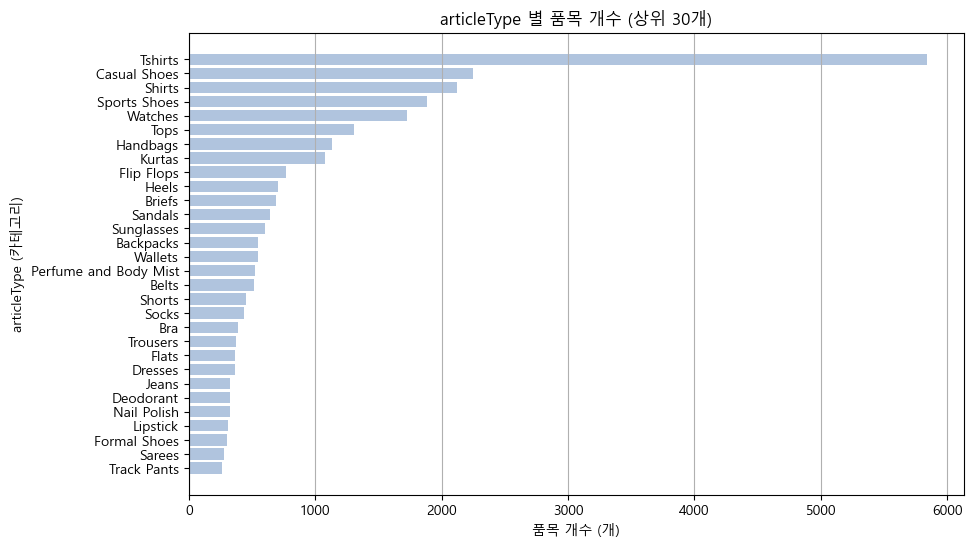

In [116]:
article_category_counts = pr['articleType'].value_counts().head(30)  # (상위 30개만)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6))

plt.barh(article_category_counts.index, article_category_counts.values, color='lightsteelblue')

plt.xlabel('품목 개수 (개)')
plt.ylabel('articleType (카테고리)')
plt.title('articleType 별 품목 개수 (상위 30개)')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

In [117]:
# 본 회사가 판매하는 드레스의 품목 개수는 500개 미만 → 소비자의 니즈 ≠ 본사의 방향 (문제점 3)

# 소비자가 관심을 보이는 드레스 품목 확대 필요 (또는 중고드레스 판매도 고려해볼 것)

### 인사이트 도출

#### 페이지 간 상관관계

In [118]:
tr['price'] = tr['item_price'] * tr['quantity']
cl['price'] = cl['item_price'] * cl['quantity']

tr = tr.drop(['shipment_fee', 'shipment_date_limit', 'shipment_time', 'distance(km)'], axis=1).reset_index(drop=True)

# 2016-06-30 데이터 삭제 (6월데이터는 한 개 존재 → 이상치로 간주)
tr = tr[tr['created_at'] != "2016-06-30 23:18:44.792905+00:00"]
cl = cl[cl['session_id'] != "607d864b-76b5-45a1-a45d-7fb666a03ea1"]

tr = tr.reset_index(drop=True)
tr

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,total_amount,product_id,quantity,item_price,year,buy_age,price
0,2018-07-29 15:22:01.458193+00:00,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,199832,54728,1,191247,2018,17,191247
1,2018-07-30 12:40:22.365620+00:00,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,Not Promoted,155526,16193,1,145526,2018,22,145526
2,2018-09-15 11:51:17.365620+00:00,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,Not Promoted,550696,53686,4,135174,2018,22,540696
3,2018-11-01 11:23:48.365620+00:00,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,Not Promoted,271012,20228,1,271012,2018,22,271012
4,2018-12-18 11:20:30.365620+00:00,4774,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,Not Promoted,198753,55220,1,198753,2018,22,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254579,2021-09-21 22:10:05.074873+00:00,25121,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,Not Promoted,226820,30642,2,113410,2021,28,226820
1254580,2021-12-09 07:35:18.222046+00:00,34829,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,359203,19394,1,354213,2021,15,354213
1254581,2021-12-11 01:20:36.944593+00:00,99645,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,1158159,13079,4,288835,2021,30,1155340
1254582,2019-12-18 11:01:09.623382+00:00,87319,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,184143,11312,1,188646,2019,12,188646


In [119]:
cl = cl.sort_values(by=['customer_id', 'event_time']).reset_index(drop=True)
cl

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id,price
0,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,HOMEPAGE,2018-08-25T18:53:48.906490Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,3.0,NaN
1,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,CLICK,2018-08-25T18:53:51.906490Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,3.0,NaN
2,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,ADD_TO_CART,2018-08-25T18:53:53.906490Z,MOBILE,33351.0,1.0,318832.0,None,None,None,NaN,3.0,318832.0
3,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,ADD_TO_CART,2018-08-25T18:53:54.906490Z,MOBILE,56019.0,5.0,166934.0,None,None,None,NaN,3.0,834670.0
4,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,CLICK,2018-08-25T18:53:55.906490Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833583,e5b4938f-1c97-451e-9baa-1d7d821af50c,ADD_TO_CART,2022-07-31T23:59:05.840805Z,MOBILE,28637.0,1.0,345393.0,None,None,None,NaN,NaN,345393.0
12833584,bee9f986-e405-4a12-9144-e42e6c05a9c1,PROMO_PAGE,2022-07-31T23:59:17.816258Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN
12833585,f49a7504-1ae0-4a92-abf6-dfd4488b4956,ITEM_DETAIL,2022-07-31T23:59:21.294682Z,WEB,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN
12833586,32f53eb8-30ef-4e0c-b38c-eb567431e0fe,ADD_TO_CART,2022-07-31T23:59:29.804932Z,MOBILE,7881.0,3.0,342289.0,None,None,None,NaN,NaN,1026867.0


In [120]:
event_counts = cl.groupby(['session_id', 'event_name'], as_index=False).size()
event_counts

,session_id,event_name,size
0,00001f29-3ede-4445-95f0-0178934e32ba,ADD_TO_CART,1
1,00001f29-3ede-4445-95f0-0178934e32ba,BOOKING,1
2,00001f29-3ede-4445-95f0-0178934e32ba,CLICK,2
3,00001f29-3ede-4445-95f0-0178934e32ba,HOMEPAGE,2
4,00001f29-3ede-4445-95f0-0178934e32ba,ITEM_DETAIL,1
...,...,...,...
5553037,fffffaf6-55ee-428b-a3bf-075cd7f1a093,HOMEPAGE,5
5553038,fffffaf6-55ee-428b-a3bf-075cd7f1a093,ITEM_DETAIL,8
5553039,fffffaf6-55ee-428b-a3bf-075cd7f1a093,PROMO_PAGE,3
5553040,fffffaf6-55ee-428b-a3bf-075cd7f1a093,SCROLL,11


In [121]:
page_count = event_counts.pivot_table(index='session_id', columns='event_name', values='size', fill_value=0).reset_index()
page_count

event_name,session_id,ADD_PROMO,ADD_TO_CART,BOOKING,CLICK,HOMEPAGE,ITEM_DETAIL,PROMO_PAGE,SCROLL,SEARCH
0,00001f29-3ede-4445-95f0-0178934e32ba,0,1,1,2,2,1,0,1,0
1,00003eca-954b-4150-aee1-63fc62f395cf,0,1,1,0,1,0,1,0,0
2,0000425b-ddc8-4459-a240-6ba814dac132,0,1,1,0,1,0,1,0,0
3,00005746-17ec-449c-9c5c-699a3ea9304a,0,1,1,23,9,8,1,12,11
4,0000649b-9514-4600-979b-42166a798996,1,3,1,3,3,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...
895197,ffffce53-1ba7-4d7d-a14a-ffa7079cfbff,1,2,1,3,5,0,3,2,2
895198,ffffd3d9-79db-459e-a427-388204a7aac7,1,4,1,3,2,2,0,5,1
895199,ffffdf8e-dea1-42bc-9839-7662675c0d38,0,1,1,11,7,5,2,11,2
895200,fffff7cf-2a18-4303-9c12-aa836ae3b543,1,5,1,4,1,1,0,1,1


In [122]:
# 세션 별 총 매출
total_price = cl.groupby('session_id', as_index=False)['price'].sum()
page_count = pd.merge(page_count, total_price, on='session_id', how='outer')
page_count.rename(columns={'price':'total_price'}, inplace=True)
page_count

,session_id,ADD_PROMO,ADD_TO_CART,BOOKING,CLICK,HOMEPAGE,ITEM_DETAIL,PROMO_PAGE,SCROLL,SEARCH,total_price
0,00001f29-3ede-4445-95f0-0178934e32ba,0,1,1,2,2,1,0,1,0,1427802.0
1,00003eca-954b-4150-aee1-63fc62f395cf,0,1,1,0,1,0,1,0,0,339790.0
2,0000425b-ddc8-4459-a240-6ba814dac132,0,1,1,0,1,0,1,0,0,281698.0
3,00005746-17ec-449c-9c5c-699a3ea9304a,0,1,1,23,9,8,1,12,11,1231854.0
4,0000649b-9514-4600-979b-42166a798996,1,3,1,3,3,3,1,2,1,728437.0
...,...,...,...,...,...,...,...,...,...,...,...
895197,ffffce53-1ba7-4d7d-a14a-ffa7079cfbff,1,2,1,3,5,0,3,2,2,456049.0
895198,ffffd3d9-79db-459e-a427-388204a7aac7,1,4,1,3,2,2,0,5,1,5058196.0
895199,ffffdf8e-dea1-42bc-9839-7662675c0d38,0,1,1,11,7,5,2,11,2,349771.0
895200,fffff7cf-2a18-4303-9c12-aa836ae3b543,1,5,1,4,1,1,0,1,1,1480289.0


In [123]:
page_count['customer_id'] = page_count['session_id'].map(sessionid_customerid_dict)
page_count

,session_id,ADD_PROMO,ADD_TO_CART,BOOKING,CLICK,HOMEPAGE,ITEM_DETAIL,PROMO_PAGE,SCROLL,SEARCH,total_price,customer_id
0,00001f29-3ede-4445-95f0-0178934e32ba,0,1,1,2,2,1,0,1,0,1427802.0,74433.0
1,00003eca-954b-4150-aee1-63fc62f395cf,0,1,1,0,1,0,1,0,0,339790.0,43805.0
2,0000425b-ddc8-4459-a240-6ba814dac132,0,1,1,0,1,0,1,0,0,281698.0,90074.0
3,00005746-17ec-449c-9c5c-699a3ea9304a,0,1,1,23,9,8,1,12,11,1231854.0,25255.0
4,0000649b-9514-4600-979b-42166a798996,1,3,1,3,3,3,1,2,1,728437.0,16868.0
...,...,...,...,...,...,...,...,...,...,...,...,...
895197,ffffce53-1ba7-4d7d-a14a-ffa7079cfbff,1,2,1,3,5,0,3,2,2,456049.0,544.0
895198,ffffd3d9-79db-459e-a427-388204a7aac7,1,4,1,3,2,2,0,5,1,5058196.0,15566.0
895199,ffffdf8e-dea1-42bc-9839-7662675c0d38,0,1,1,11,7,5,2,11,2,349771.0,65771.0
895200,fffff7cf-2a18-4303-9c12-aa836ae3b543,1,5,1,4,1,1,0,1,1,1480289.0,2353.0


In [124]:
notjoin = page_count[page_count['customer_id'].isnull()].reset_index(drop=True)
join = page_count[page_count['customer_id'].notnull()].reset_index(drop=True)

In [125]:
print(notjoin.shape[0])
print(join.shape[0])

42621
852581


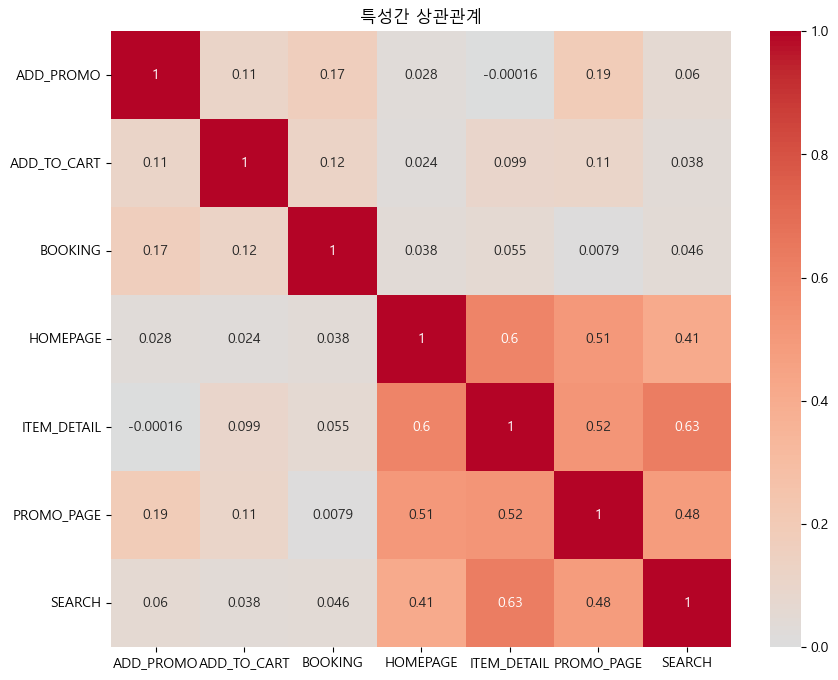

In [126]:
# 컬럼 간 상관관계
correlation_matrix = (page_count.drop(['session_id', 'CLICK', 'SCROLL', 'customer_id', 'total_price'], axis=1)).corr()

# Heatmap을 통한 시각화
plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'Malgun Gothic'

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("특성간 상관관계")
plt.show()

In [127]:
# BOOKING 에 영향을 주는 요소 : ADD PROMO 가 약간의 영향을 미침 → 장바구니에 담고 구매를 하지 않은 경우, 할인쿠폰과 함께 알림가게 하기

#### 접속 주기

In [128]:
join = cl[cl['customer_id'].notnull()].reset_index(drop=True)
join = join.sort_values(by=['customer_id', 'event_time'])
join

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id,price
0,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,HOMEPAGE,2018-08-25T18:53:48.906490Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,3.0,NaN
1,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,CLICK,2018-08-25T18:53:51.906490Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,3.0,NaN
2,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,ADD_TO_CART,2018-08-25T18:53:53.906490Z,MOBILE,33351.0,1.0,318832.0,None,None,None,NaN,3.0,318832.0
3,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,ADD_TO_CART,2018-08-25T18:53:54.906490Z,MOBILE,56019.0,5.0,166934.0,None,None,None,NaN,3.0,834670.0
4,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,CLICK,2018-08-25T18:53:55.906490Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12462985,0d388e45-49fc-44e1-9211-1a42db40f7ec,CLICK,2016-10-12T19:20:44.362641Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,99999.0,NaN
12462986,0d388e45-49fc-44e1-9211-1a42db40f7ec,SEARCH,2016-10-12T19:21:05.362641Z,MOBILE,NaN,NaN,NaN,None,Baju,None,NaN,99999.0,NaN
12462987,0d388e45-49fc-44e1-9211-1a42db40f7ec,SCROLL,2016-10-12T19:21:28.362641Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,99999.0,NaN
12462988,0d388e45-49fc-44e1-9211-1a42db40f7ec,SEARCH,2016-10-12T19:21:44.362641Z,MOBILE,NaN,NaN,NaN,None,Second,None,NaN,99999.0,NaN


In [129]:
join['event_time'] = pd.to_datetime(join['event_time'])
join['access_cycle'] = join.groupby('customer_id')['event_time'].diff().dt.days
join

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id,price,access_cycle
0,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,HOMEPAGE,2018-08-25 18:53:48.906490+00:00,MOBILE,NaN,NaN,NaN,None,None,None,NaN,3.0,NaN,NaN
1,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,CLICK,2018-08-25 18:53:51.906490+00:00,MOBILE,NaN,NaN,NaN,None,None,None,NaN,3.0,NaN,0.0
2,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,ADD_TO_CART,2018-08-25 18:53:53.906490+00:00,MOBILE,33351.0,1.0,318832.0,None,None,None,NaN,3.0,318832.0,0.0
3,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,ADD_TO_CART,2018-08-25 18:53:54.906490+00:00,MOBILE,56019.0,5.0,166934.0,None,None,None,NaN,3.0,834670.0,0.0
4,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,CLICK,2018-08-25 18:53:55.906490+00:00,MOBILE,NaN,NaN,NaN,None,None,None,NaN,3.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12462985,0d388e45-49fc-44e1-9211-1a42db40f7ec,CLICK,2016-10-12 19:20:44.362641+00:00,MOBILE,NaN,NaN,NaN,None,None,None,NaN,99999.0,NaN,0.0
12462986,0d388e45-49fc-44e1-9211-1a42db40f7ec,SEARCH,2016-10-12 19:21:05.362641+00:00,MOBILE,NaN,NaN,NaN,None,Baju,None,NaN,99999.0,NaN,0.0
12462987,0d388e45-49fc-44e1-9211-1a42db40f7ec,SCROLL,2016-10-12 19:21:28.362641+00:00,MOBILE,NaN,NaN,NaN,None,None,None,NaN,99999.0,NaN,0.0
12462988,0d388e45-49fc-44e1-9211-1a42db40f7ec,SEARCH,2016-10-12 19:21:44.362641+00:00,MOBILE,NaN,NaN,NaN,None,Second,None,NaN,99999.0,NaN,0.0


In [130]:
data = join[join['access_cycle'] != 0]
data = data[data['access_cycle'].notnull()]
data = data.sort_values(by=['access_cycle']).reset_index(drop=True)
data

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id,price,access_cycle
0,419c1071-399e-49ce-ad50-8241f431000c,BOOKING,2018-06-29 16:01:20.483205+00:00,MOBILE,NaN,NaN,NaN,Success,None,None,NaN,49103.0,NaN,1.0
1,a8769281-afa2-42d5-b1f8-376c0584b4ba,CLICK,2019-02-15 01:23:29.961726+00:00,MOBILE,NaN,NaN,NaN,None,None,None,NaN,23131.0,NaN,1.0
2,a8769281-afa2-42d5-b1f8-376c0584b4ba,CLICK,2019-02-16 23:58:23.961726+00:00,MOBILE,NaN,NaN,NaN,None,None,None,NaN,23131.0,NaN,1.0
3,a8769281-afa2-42d5-b1f8-376c0584b4ba,ITEM_DETAIL,2019-02-18 22:33:03.961726+00:00,MOBILE,NaN,NaN,NaN,None,None,None,NaN,23131.0,NaN,1.0
4,a8769281-afa2-42d5-b1f8-376c0584b4ba,CLICK,2019-02-20 20:54:17.961726+00:00,MOBILE,NaN,NaN,NaN,None,None,None,NaN,23131.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571374,e0e98b99-5995-4fa3-90bd-512e181feb63,HOMEPAGE,2019-08-22 11:53:39.673607+00:00,MOBILE,NaN,NaN,NaN,None,None,None,NaN,11137.0,NaN,1071.0
2571375,8c5e294e-139b-4798-8557-1d56721552cb,HOMEPAGE,2019-07-20 12:15:41.395203+00:00,MOBILE,NaN,NaN,NaN,None,None,None,NaN,80330.0,NaN,1072.0
2571376,fba0c0bd-2ef3-4be3-918e-22b3808e5c7f,HOMEPAGE,2019-07-16 09:02:27.650645+00:00,MOBILE,NaN,NaN,NaN,None,None,None,NaN,92358.0,NaN,1077.0
2571377,809587b5-94fb-465a-885d-98608d99d957,HOMEPAGE,2019-07-31 19:28:44.957454+00:00,MOBILE,NaN,NaN,NaN,None,None,None,NaN,100.0,NaN,1080.0


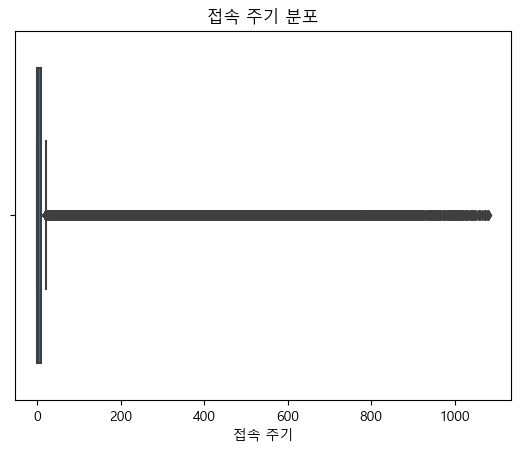

In [131]:
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.boxplot(x=data['access_cycle'])

plt.xlabel('접속 주기')
plt.title('접속 주기 분포')
plt.show()

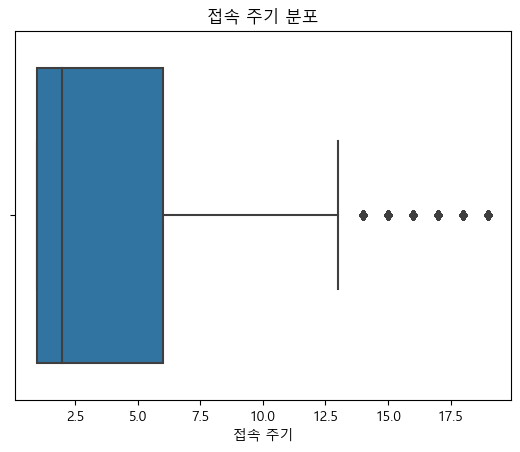

In [132]:
data2 = data.query('access_cycle < 20')

plt.rcParams['font.family'] = 'Malgun Gothic'
sns.boxplot(x=data2['access_cycle'])

plt.xlabel('접속 주기')
plt.title('접속 주기 분포')
plt.show()

In [133]:
mean_access_cycle = data.groupby('customer_id', as_index=False)['access_cycle'].mean()
mean_access_cycle.rename(columns={'access_cycle':'mean_access_cycle'}, inplace=True)
mean_access_cycle

,customer_id,mean_access_cycle
0,3.0,6.310526
1,8.0,19.050000
2,9.0,9.529412
3,15.0,21.289474
4,17.0,74.444444
...,...,...
40251,99989.0,17.850000
40252,99991.0,56.500000
40253,99992.0,14.413043
40254,99995.0,4.411765


In [134]:
median_access_cycle = data.groupby('customer_id', as_index=False)['access_cycle'].median()
median_access_cycle.rename(columns={'access_cycle':'median_access_cycle'}, inplace=True)
median_access_cycle

,customer_id,median_access_cycle
0,3.0,1.0
1,8.0,5.5
2,9.0,1.0
3,15.0,8.0
4,17.0,4.0
...,...,...
40251,99989.0,3.0
40252,99991.0,35.0
40253,99992.0,3.0
40254,99995.0,3.0


In [135]:
access_cycle = pd.merge(mean_access_cycle, median_access_cycle, on='customer_id', how='inner')
access_cycle

,customer_id,mean_access_cycle,median_access_cycle
0,3.0,6.310526,1.0
1,8.0,19.050000,5.5
2,9.0,9.529412,1.0
3,15.0,21.289474,8.0
4,17.0,74.444444,4.0
...,...,...,...
40251,99989.0,17.850000,3.0
40252,99991.0,56.500000,35.0
40253,99992.0,14.413043,3.0
40254,99995.0,4.411765,3.0


In [136]:
# 주기가 없는 사람 (1회 구매 → 마지막 거래일로부터의 기간으로 설정)
cycle_exist = access_cycle['customer_id'].unique().tolist()

cycle_not_exist = list(set(cl['customer_id'].unique().tolist()) - set(access_cycle['customer_id'].unique().tolist()))
one_purchase = cl.query('customer_id in @cycle_not_exist')
one_purchase = one_purchase[one_purchase['customer_id'].notnull()].reset_index(drop=True)
one_purchase

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id,price
0,5f20fb20-8e35-4e30-a9d9-fc6a07d7835c,HOMEPAGE,2022-03-07T13:40:28.671942Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,11.0,NaN
1,5f20fb20-8e35-4e30-a9d9-fc6a07d7835c,PROMO_PAGE,2022-03-07T13:44:11.671942Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,11.0,NaN
2,5f20fb20-8e35-4e30-a9d9-fc6a07d7835c,ADD_TO_CART,2022-03-07T13:44:42.671942Z,MOBILE,21536.0,1.0,192025.0,None,None,None,NaN,11.0,192025.0
3,5f20fb20-8e35-4e30-a9d9-fc6a07d7835c,HOMEPAGE,2022-03-07T13:48:19.671942Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,11.0,NaN
4,5f20fb20-8e35-4e30-a9d9-fc6a07d7835c,ADD_PROMO,2022-03-07T13:48:42.671942Z,MOBILE,NaN,NaN,NaN,None,None,XX2022,9492.0,11.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173190,0d388e45-49fc-44e1-9211-1a42db40f7ec,CLICK,2016-10-12T19:20:44.362641Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,99999.0,NaN
173191,0d388e45-49fc-44e1-9211-1a42db40f7ec,SEARCH,2016-10-12T19:21:05.362641Z,MOBILE,NaN,NaN,NaN,None,Baju,None,NaN,99999.0,NaN
173192,0d388e45-49fc-44e1-9211-1a42db40f7ec,SCROLL,2016-10-12T19:21:28.362641Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,99999.0,NaN
173193,0d388e45-49fc-44e1-9211-1a42db40f7ec,SEARCH,2016-10-12T19:21:44.362641Z,MOBILE,NaN,NaN,NaN,None,Second,None,NaN,99999.0,NaN


In [137]:
standard_date = pd.to_datetime('2022-07-31')

one_purchase['event_day'] = one_purchase['event_time'].apply(lambda x: str(x)[:-17])
one_purchase['event_day'] = pd.to_datetime(one_purchase['event_day'])
one_purchase['last_access'] = standard_date - one_purchase['event_day']
one_purchase['last_access'] = one_purchase['last_access'].astype(str).apply(lambda x: str(x)[:-5]).astype(int)
one_purchase['last_access2'] = one_purchase['last_access']
one_purchase

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id,price,event_day,last_access,last_access2
0,5f20fb20-8e35-4e30-a9d9-fc6a07d7835c,HOMEPAGE,2022-03-07T13:40:28.671942Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,11.0,NaN,2022-03-07,146,146
1,5f20fb20-8e35-4e30-a9d9-fc6a07d7835c,PROMO_PAGE,2022-03-07T13:44:11.671942Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,11.0,NaN,2022-03-07,146,146
2,5f20fb20-8e35-4e30-a9d9-fc6a07d7835c,ADD_TO_CART,2022-03-07T13:44:42.671942Z,MOBILE,21536.0,1.0,192025.0,None,None,None,NaN,11.0,192025.0,2022-03-07,146,146
3,5f20fb20-8e35-4e30-a9d9-fc6a07d7835c,HOMEPAGE,2022-03-07T13:48:19.671942Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,11.0,NaN,2022-03-07,146,146
4,5f20fb20-8e35-4e30-a9d9-fc6a07d7835c,ADD_PROMO,2022-03-07T13:48:42.671942Z,MOBILE,NaN,NaN,NaN,None,None,XX2022,9492.0,11.0,NaN,2022-03-07,146,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173190,0d388e45-49fc-44e1-9211-1a42db40f7ec,CLICK,2016-10-12T19:20:44.362641Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,99999.0,NaN,2016-10-12,2118,2118
173191,0d388e45-49fc-44e1-9211-1a42db40f7ec,SEARCH,2016-10-12T19:21:05.362641Z,MOBILE,NaN,NaN,NaN,None,Baju,None,NaN,99999.0,NaN,2016-10-12,2118,2118
173192,0d388e45-49fc-44e1-9211-1a42db40f7ec,SCROLL,2016-10-12T19:21:28.362641Z,MOBILE,NaN,NaN,NaN,None,None,None,NaN,99999.0,NaN,2016-10-12,2118,2118
173193,0d388e45-49fc-44e1-9211-1a42db40f7ec,SEARCH,2016-10-12T19:21:44.362641Z,MOBILE,NaN,NaN,NaN,None,Second,None,NaN,99999.0,NaN,2016-10-12,2118,2118


In [138]:
one_purchase = one_purchase[['customer_id', 'last_access', 'last_access2']]
one_purchase = one_purchase.rename(columns={'last_access':'mean_access_cycle', 'last_access2':'median_access_cycle'})
one_purchase = one_purchase.drop_duplicates(['customer_id'], keep='last').reset_index(drop=True)
one_purchase

,customer_id,mean_access_cycle,median_access_cycle
0,11.0,146,146
1,21.0,361,361
2,26.0,628,628
3,40.0,854,854
4,41.0,860,860
...,...,...,...
10443,99971.0,1098,1098
10444,99974.0,2086,2086
10445,99981.0,1270,1270
10446,99997.0,827,827


In [139]:
access_cycle = pd.concat([access_cycle, one_purchase], ignore_index = True)
access_cycle

,customer_id,mean_access_cycle,median_access_cycle
0,3.0,6.310526,1.0
1,8.0,19.050000,5.5
2,9.0,9.529412,1.0
3,15.0,21.289474,8.0
4,17.0,74.444444,4.0
...,...,...,...
50699,99971.0,1098.000000,1098.0
50700,99974.0,2086.000000,2086.0
50701,99981.0,1270.000000,1270.0
50702,99997.0,827.000000,827.0


In [140]:
# 주기가 없는 사람 (0회 구매 → 회원가입일로부터의 기간으로 설정)
cycle_exist = access_cycle['customer_id'].unique().tolist()

cycle_not_exist = list(set(cu['customer_id'].unique().tolist()) - set(access_cycle['customer_id'].unique().tolist()))
not_purchased = cu.query('customer_id in @cycle_not_exist')
not_purchased

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,birthdate,first_join_date
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,1996-06-14,2019-07-21
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,1993-08-16,2017-07-16
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,1991-01-05,2021-10-03
5,5440,F,35,33,Android,4.0.4,4,-6.277891,106.786538,Jakarta Raya,1989-01-09,2021-05-30
6,90319,M,34,30,Android,8.1.0,8,0.869352,103.873668,Kepulauan Riau,1990-01-12,2019-12-14
...,...,...,...,...,...,...,...,...,...,...,...,...
99978,56781,M,22,21,Android,1.6,1,-1.854536,102.071355,Jambi,2002-02-17,2022-01-02
99981,20595,F,21,19,Android,2.3.4,2,-8.566950,115.363376,Bali,2003-04-27,2021-08-01
99986,59948,F,22,19,Android,1.1,1,-2.930867,129.739377,Maluku,2002-11-26,2020-11-27
99991,64260,F,27,25,Android,1.0,1,-6.941088,112.588262,Jawa Timur,1997-01-30,2021-06-29


In [141]:
standard_date = pd.to_datetime('2022-07-31')

not_purchased['first_join_date'] = pd.to_datetime(not_purchased['first_join_date'])
not_purchased['last_access'] = standard_date - not_purchased['first_join_date']
not_purchased['last_access'] = not_purchased['last_access'].astype(str).apply(lambda x: str(x)[:-5]).astype(int)
not_purchased['last_access2'] = not_purchased['last_access']
not_purchased

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,birthdate,first_join_date,last_access,last_access2
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,1996-06-14,2019-07-21,1106,1106
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,1993-08-16,2017-07-16,1841,1841
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,1991-01-05,2021-10-03,301,301
5,5440,F,35,33,Android,4.0.4,4,-6.277891,106.786538,Jakarta Raya,1989-01-09,2021-05-30,427,427
6,90319,M,34,30,Android,8.1.0,8,0.869352,103.873668,Kepulauan Riau,1990-01-12,2019-12-14,960,960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99978,56781,M,22,21,Android,1.6,1,-1.854536,102.071355,Jambi,2002-02-17,2022-01-02,210,210
99981,20595,F,21,19,Android,2.3.4,2,-8.566950,115.363376,Bali,2003-04-27,2021-08-01,364,364
99986,59948,F,22,19,Android,1.1,1,-2.930867,129.739377,Maluku,2002-11-26,2020-11-27,611,611
99991,64260,F,27,25,Android,1.0,1,-6.941088,112.588262,Jawa Timur,1997-01-30,2021-06-29,397,397


In [142]:
not_purchased = not_purchased[['customer_id', 'last_access', 'last_access2']]
not_purchased = not_purchased.rename(columns={'last_access':'mean_access_cycle', 'last_access2':'median_access_cycle'})
not_purchased = not_purchased.drop_duplicates().reset_index(drop=True)
not_purchased

,customer_id,mean_access_cycle,median_access_cycle
0,2870,1106,1106
1,8193,1841,1841
2,88813,301,301
3,5440,427,427
4,90319,960,960
...,...,...,...
49291,56781,210,210
49292,20595,364,364
49293,59948,611,611
49294,64260,397,397


In [143]:
access_cycle = pd.concat([access_cycle, not_purchased], ignore_index = True)
access_cycle = access_cycle.sort_values(by='customer_id').reset_index(drop=True)
access_cycle

,customer_id,mean_access_cycle,median_access_cycle
0,1.0,2072.000000,2072.0
1,2.0,218.000000,218.0
2,3.0,6.310526,1.0
3,4.0,496.000000,496.0
4,5.0,225.000000,225.0
...,...,...,...
99995,99996.0,109.000000,109.0
99996,99997.0,827.000000,827.0
99997,99998.0,15.444444,1.0
99998,99999.0,2118.000000,2118.0


In [144]:
# csv 파일 변환
access_cycle.to_csv("customer_access_cycle.csv", index=False, encoding="utf-8-sig", mode="w")